In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
# import the data
df = pd.read_csv('HW4 Data/p1/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analyzing tree with max_depth=1


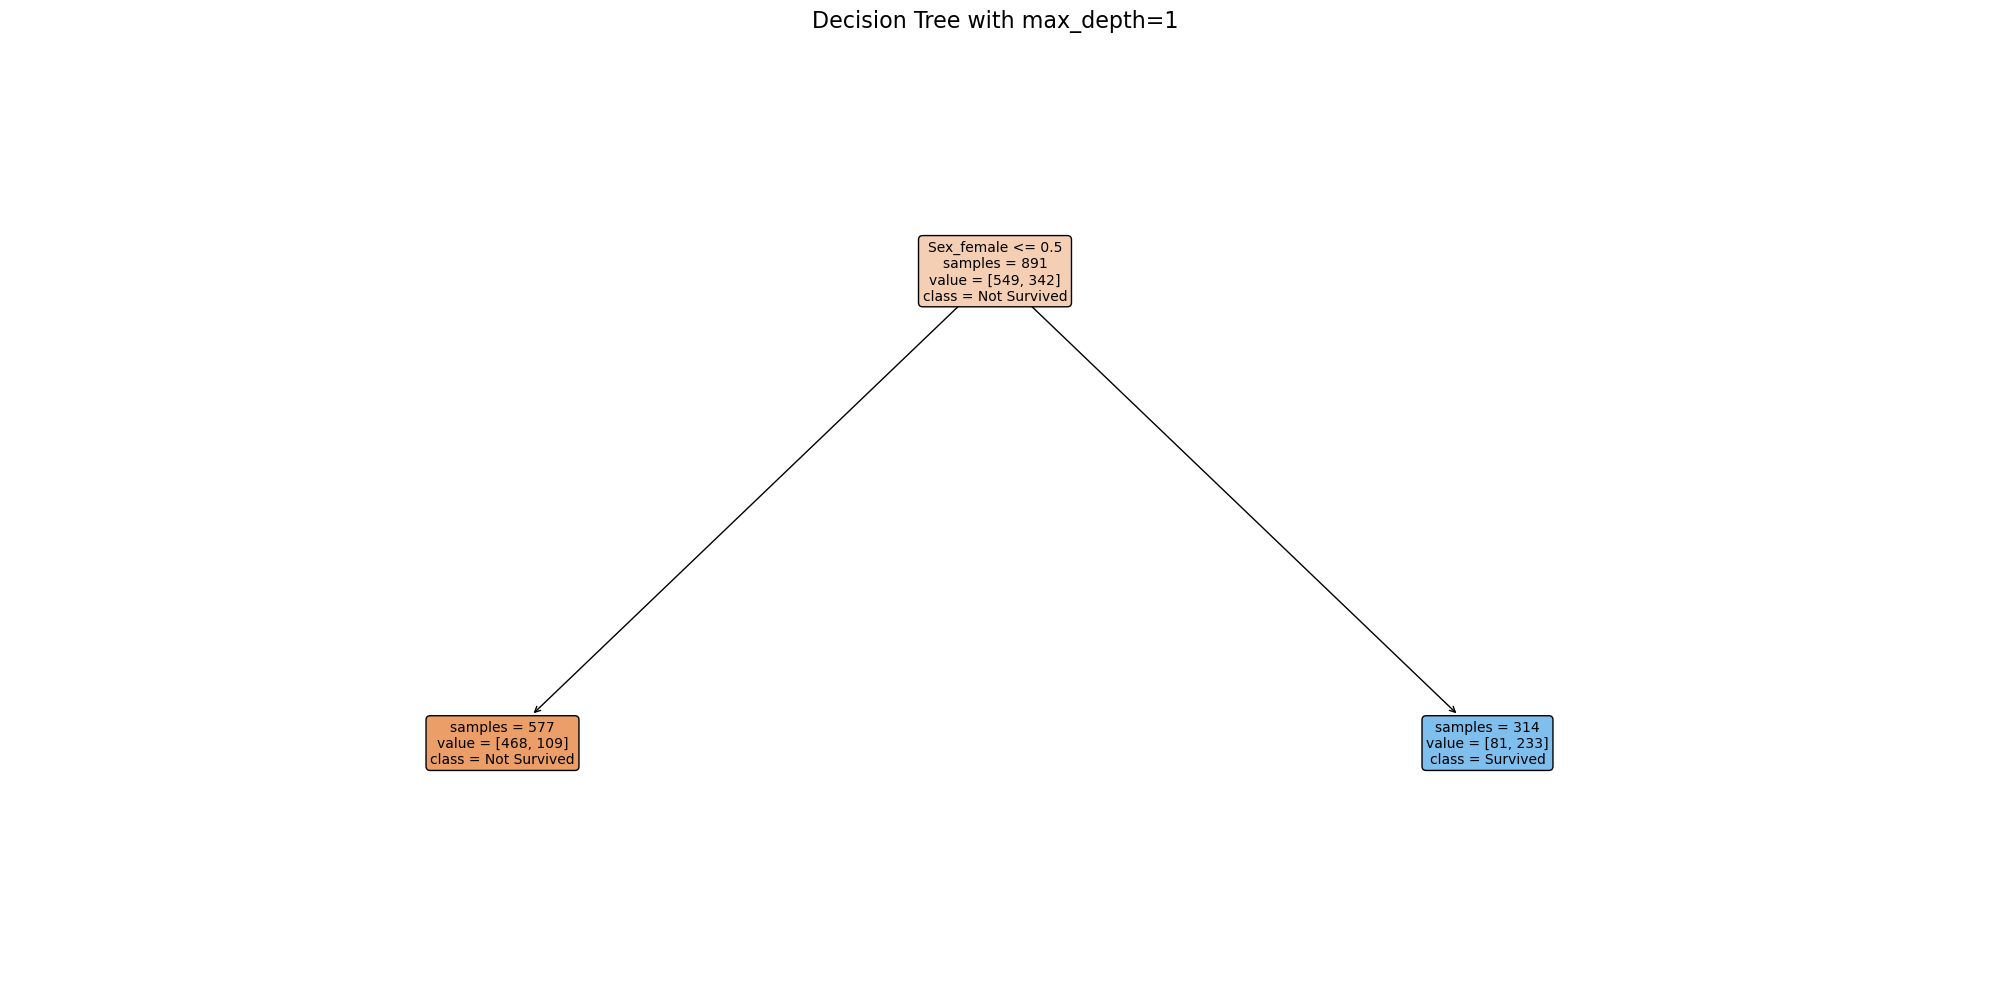

Feature ranking for depth 1
1. Sex_female (1.0000)


Analyzing tree with max_depth=2


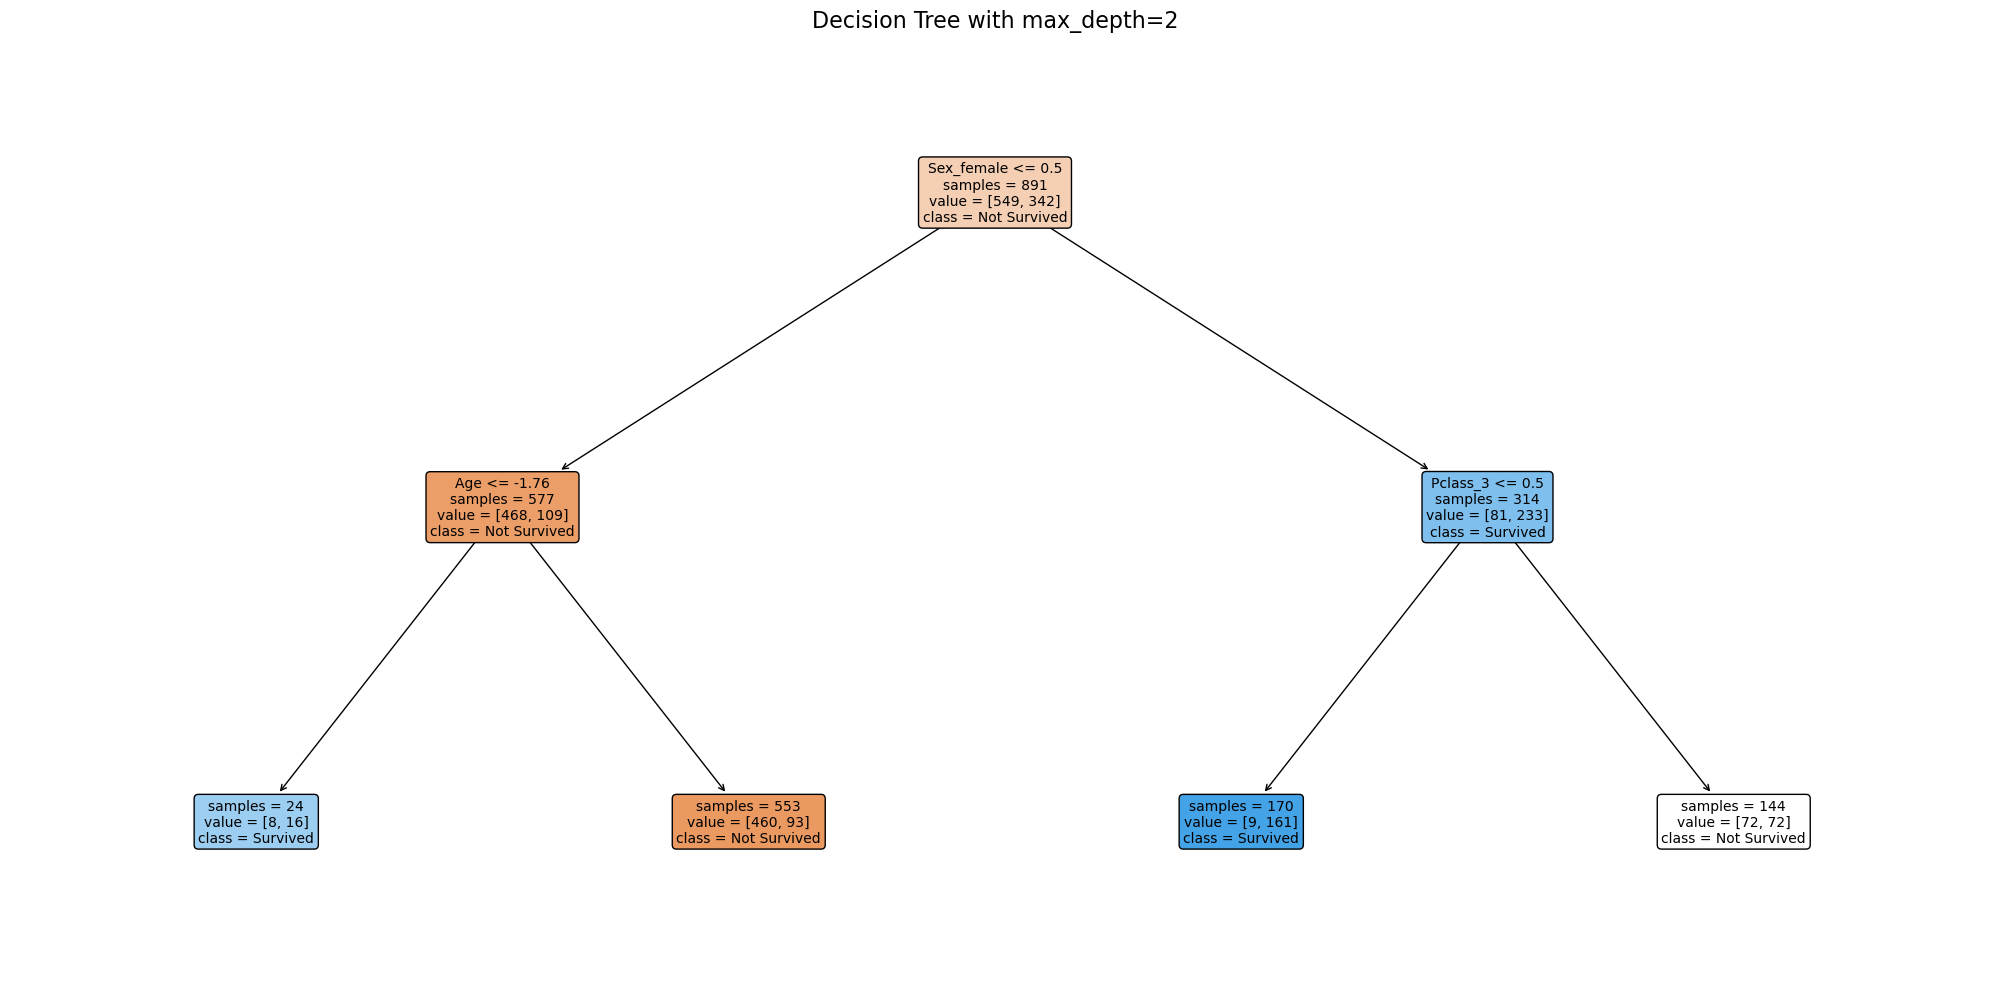

Feature ranking for depth 2
1. Sex_female (0.7450)
2. Pclass_3 (0.1866)
3. Age (0.0684)


Analyzing tree with max_depth=3


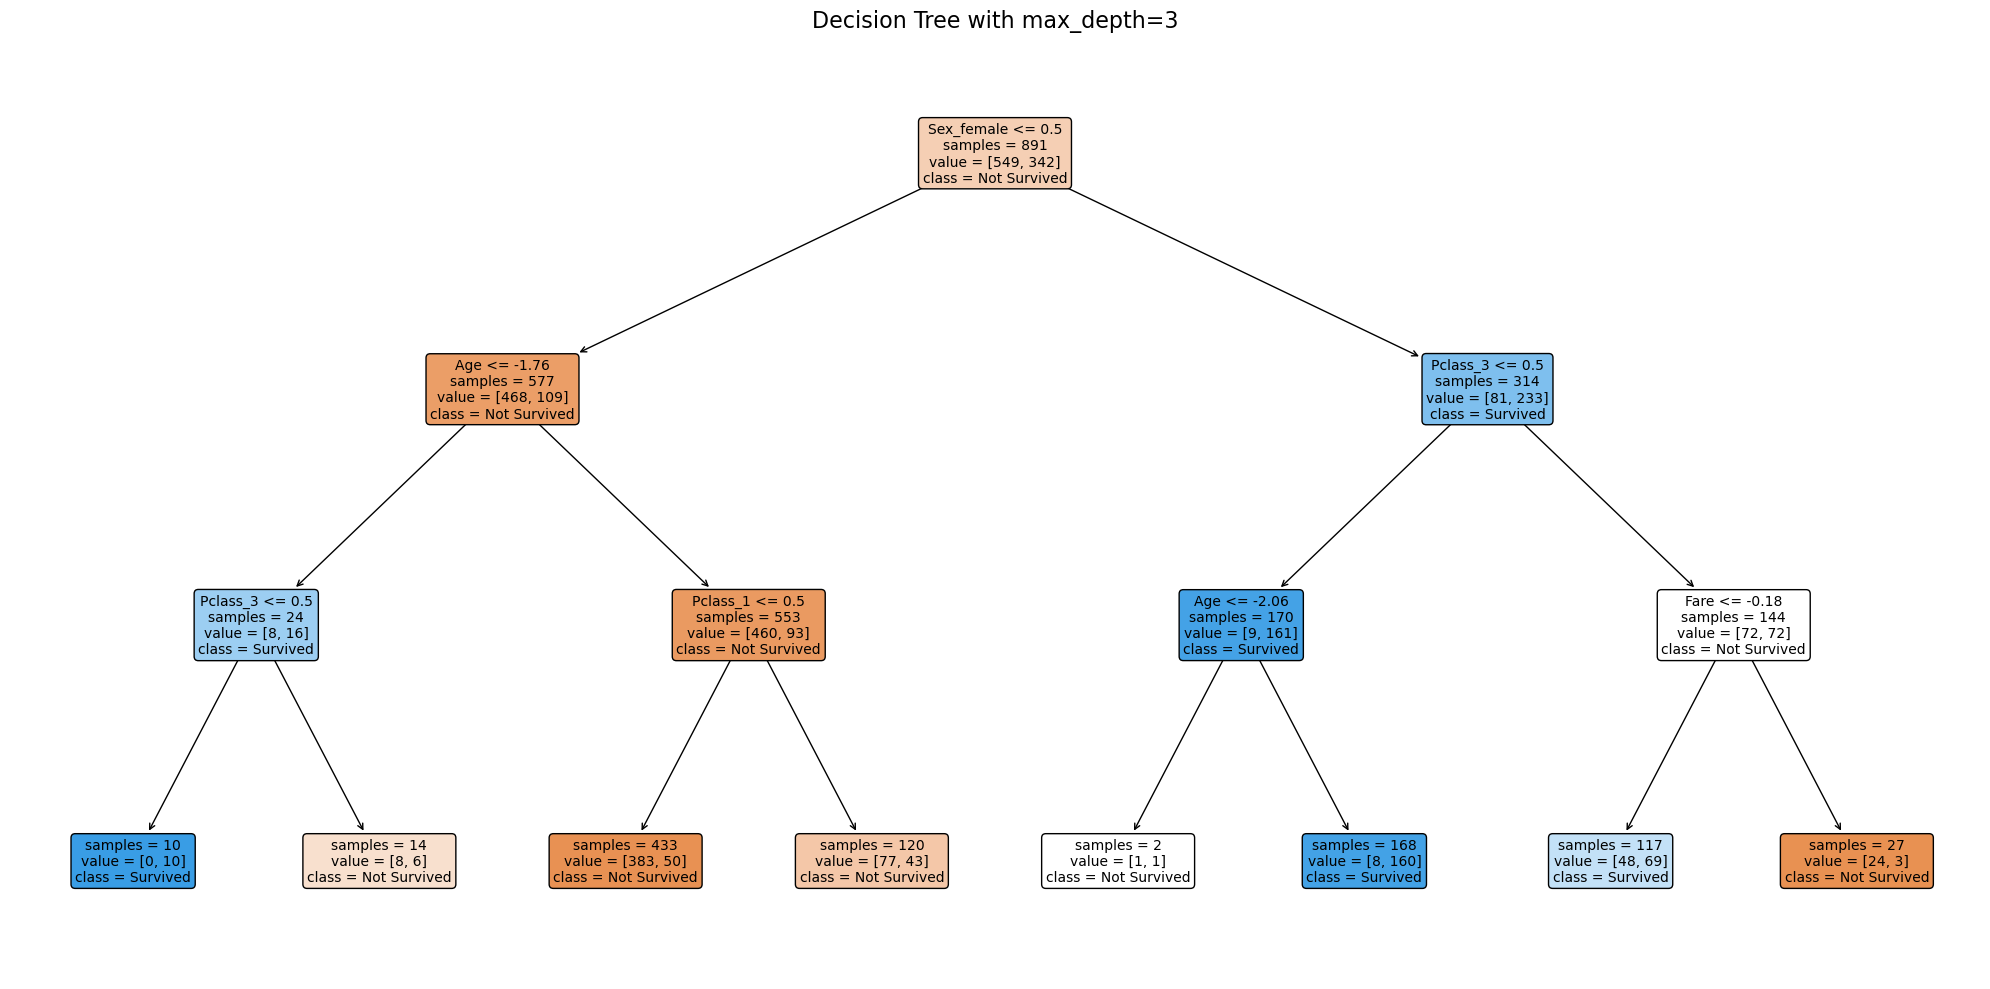

Feature ranking for depth 3
1. Sex_female (0.6454)
2. Pclass_3 (0.1814)
3. Age (0.0635)
4. Pclass_1 (0.0575)
5. Fare (0.0521)


Analyzing tree with max_depth=5


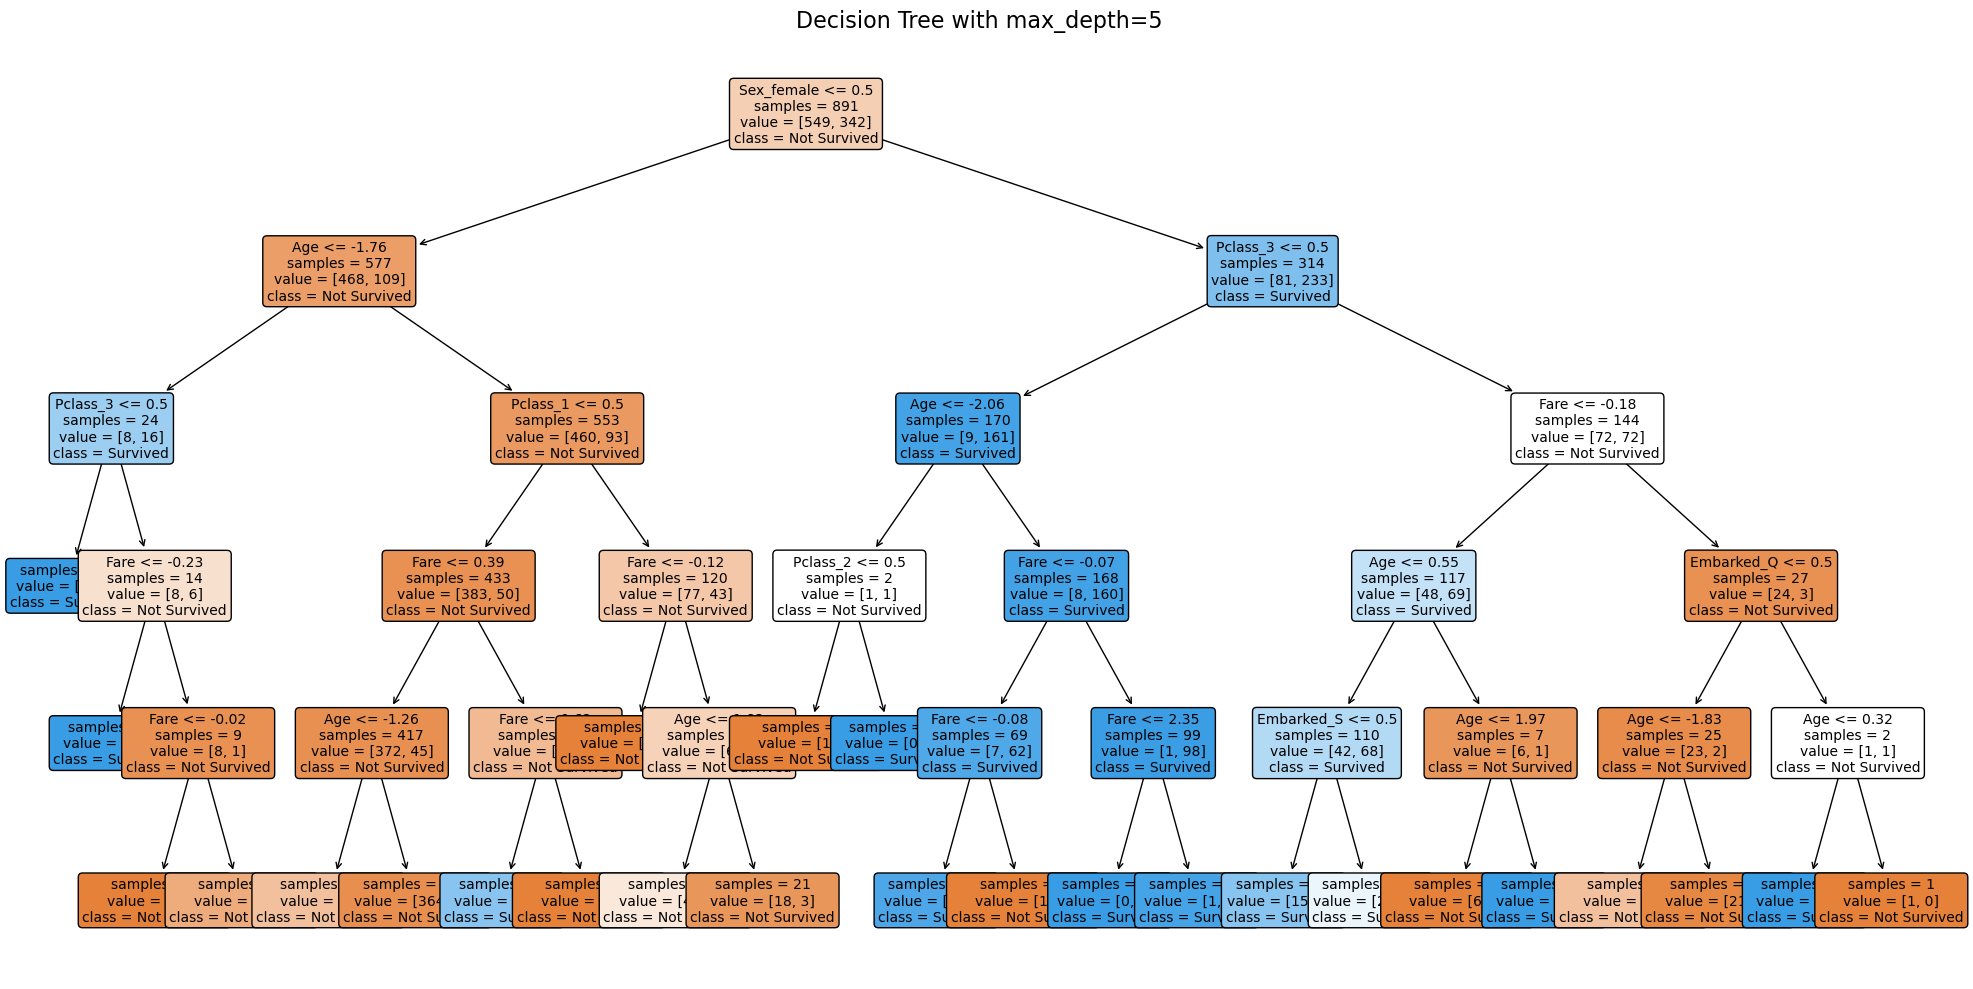

Feature ranking for depth 5
1. Sex_female (0.5583)
2. Pclass_3 (0.1569)
3. Fare (0.1163)
4. Age (0.1024)
5. Pclass_1 (0.0497)
6. Embarked_S (0.0090)
7. Pclass_2 (0.0045)
8. Embarked_Q (0.0029)


Analyzing tree with max_depth=None


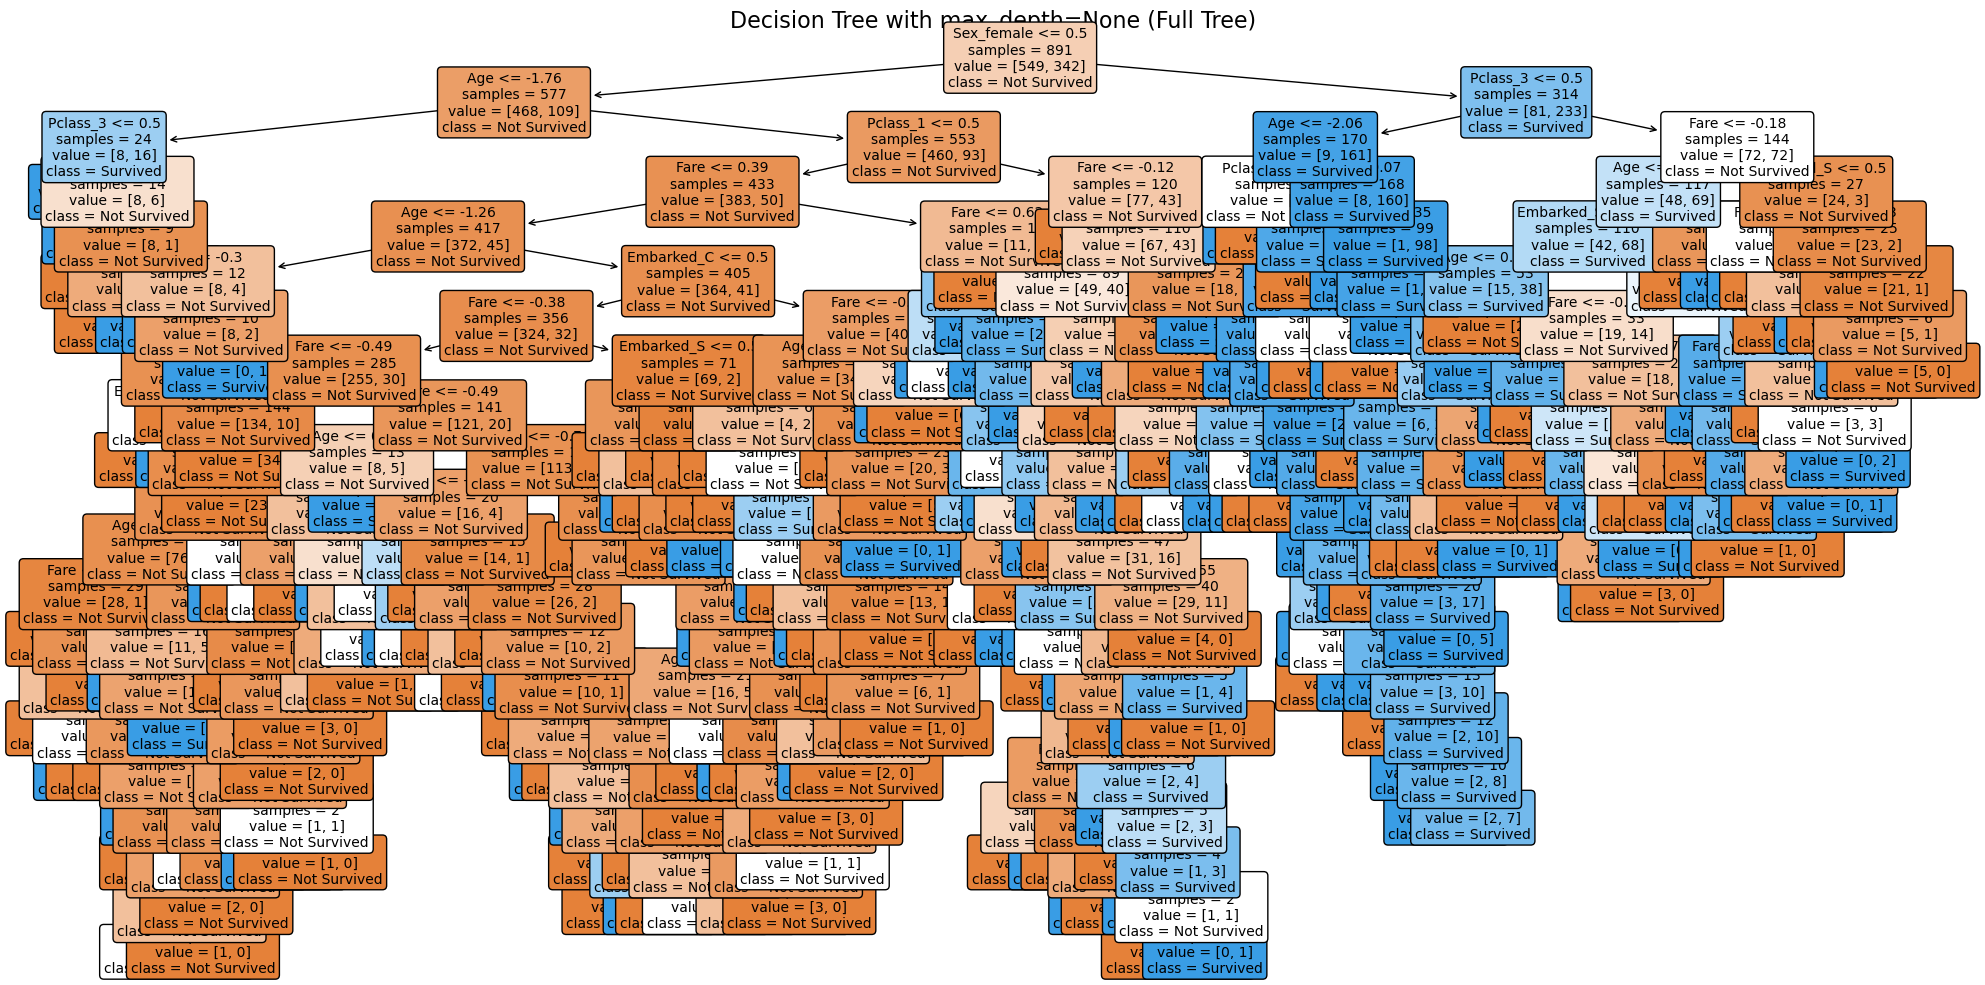

Feature ranking for depth None (Full Tree)
1. Sex_female (0.3127)
2. Fare (0.2944)
3. Age (0.2457)
4. Pclass_3 (0.0888)
5. Pclass_1 (0.0304)
6. Embarked_S (0.0144)
7. Pclass_2 (0.0074)
8. Embarked_Q (0.0044)
9. Embarked_C (0.0019)




In [13]:
from sklearn.tree import export_graphviz, plot_tree, DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Extract the features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Define depth levels to explore
depths = [1, 2, 3, 5, None]  # None will create a full tree

# Create preprocessing for numerical and categorical features
numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Numerical preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Get transformed feature names
cat_encoder = categorical_transformer.named_steps['onehot']
preprocessor.fit(X)
onehot_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
transformed_feature_names = numerical_features + list(onehot_features)

# Define a function to visualize trees at different max_depth levels
def visualize_tree_at_depth(depth, X, y, feature_names):
    # Create a new decision tree with specified max_depth
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the tree on the data
    tree.fit(X, y)
    
    # Create figure with larger size for better readability
    plt.figure(figsize=(20, 10))
    
    # Plot the tree without value labels (sample count information)
    plot_tree(tree, feature_names=feature_names, class_names=['Not Survived', 'Survived'], 
              filled=True, rounded=True, fontsize=10, proportion=False, 
              impurity=False, precision=2)
    
    # Add a title showing the depth
    depth_label = "None (Full Tree)" if depth is None else str(depth)
    plt.title(f"Decision Tree with max_depth={depth_label}", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Print feature importances
    importances = tree.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print("Feature ranking for depth", depth_label)
    for f in range(min(10, X.shape[1])):
        if importances[indices[f]] > 0:  # Only print features that have non-zero importance
            print(f"{f+1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")
    print("\n")
    
    return tree

# Apply the preprocessor to get the transformed feature names
X_transformed = preprocessor.fit_transform(X)

# Get the list of transformed feature names
feature_names = transformed_feature_names

# Visualize trees at different depths
trees = {}
for depth in depths:
    print(f"="*50)
    print(f"Analyzing tree with max_depth={depth}")
    print(f"="*50)
    trees[depth] = visualize_tree_at_depth(depth, X_transformed, y, feature_names)


# we can see that sex_male is the biggest indicator of whether a passenger survived or not
# as we increase the depth of the tree, we can see that the tree is getting more complex
# and the accuracy is increasing
# when the full tree is constructed, it has hard to read and interpret and this maybe due to the matplotlib functions used, but generally
# this is a time where you would want to prune the tree to conserve as much accuracy while still being interpretable

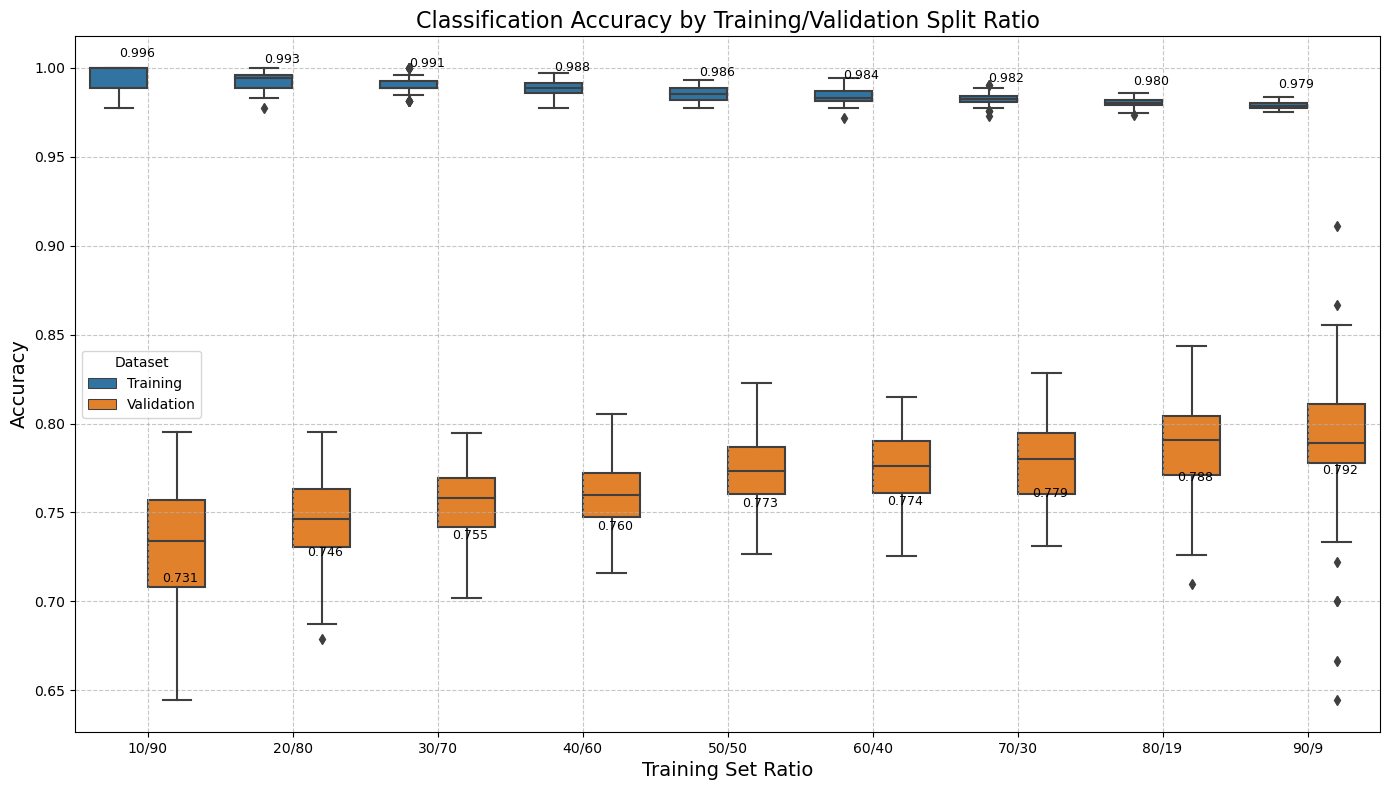

Summary Statistics:
    ratio     dataset      mean       std
0     0.1    Training  0.996180  0.006022
1     0.1  Validation  0.730910  0.034562
2     0.2    Training  0.992640  0.005796
3     0.2  Validation  0.745764  0.023802
4     0.3    Training  0.990562  0.004864
5     0.3  Validation  0.755032  0.020629
6     0.4    Training  0.988174  0.004361
7     0.4  Validation  0.760262  0.017284
8     0.5    Training  0.985551  0.004031
9     0.5  Validation  0.773094  0.019285
10    0.6    Training  0.983670  0.003660
11    0.6  Validation  0.774090  0.020489
12    0.7    Training  0.982135  0.003158
13    0.7  Validation  0.778694  0.023609
14    0.8    Training  0.980183  0.002436
15    0.8  Validation  0.787654  0.024800
16    0.9    Training  0.978876  0.001850
17    0.9  Validation  0.791556  0.038623


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Define the ratios to test
train_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n_splits = 100
results = []

# Apply preprocessing to get transformed data
X_processed = preprocessor.fit_transform(X)

# Run multiple splits for each ratio
for ratio in train_ratios:
    train_accuracies = []
    val_accuracies = []
    
    for i in range(n_splits):
        # Split the data
        X_train, X_val, y_train, y_val = train_test_split(
            X_processed, y, train_size=ratio, random_state=i)
        
        # Train a full decision tree (no max_depth)
        tree = DecisionTreeClassifier(random_state=42)
        tree.fit(X_train, y_train)
        
        # Calculate accuracies
        train_pred = tree.predict(X_train)
        val_pred = tree.predict(X_val)
        
        train_acc = accuracy_score(y_train, train_pred)
        val_acc = accuracy_score(y_val, val_pred)
        
        # Store results
        results.append({
            'ratio': ratio,
            'split': i,
            'dataset': 'Training',
            'accuracy': train_acc
        })
        results.append({
            'ratio': ratio,
            'split': i,
            'dataset': 'Validation',
            'accuracy': val_acc
        })

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='ratio', y='accuracy', hue='dataset', data=results_df)
plt.title('Classification Accuracy by Training/Validation Split Ratio', fontsize=16)
plt.xlabel('Training Set Ratio', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(ticks=range(len(train_ratios)), 
           labels=[f'{int(r*100)}/{int((1-r)*100)}' for r in train_ratios])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset')

# Add means as text annotations
for i, ratio in enumerate(train_ratios):
    train_mean = results_df[(results_df['ratio'] == ratio) & 
                           (results_df['dataset'] == 'Training')]['accuracy'].mean()
    val_mean = results_df[(results_df['ratio'] == ratio) & 
                         (results_df['dataset'] == 'Validation')]['accuracy'].mean()
    
    plt.text(i-0.2, train_mean+0.01, f'{train_mean:.3f}', fontsize=9)
    plt.text(i+0.1, val_mean-0.02, f'{val_mean:.3f}', fontsize=9)

plt.tight_layout()
plt.show()

# Calculate and print summary statistics
summary = results_df.groupby(['ratio', 'dataset'])['accuracy'].agg(['mean', 'std']).reset_index()
print("Summary Statistics:")
print(summary)

# Calculate the gap between training and validation accuracy
train_means = results_df[results_df['dataset'] == 'Training'].groupby('ratio')['accuracy'].mean()
val_means = results_df[results_df['dataset'] == 'Validation'].groupby('ratio')['accuracy'].mean()
gap = train_means - val_means

# plt.figure(figsize=(10, 6))
# plt.plot(train_ratios, gap, marker='o', linestyle='-')
# plt.title('Overfitting Gap (Training Accuracy - Validation Accuracy)', fontsize=14)
# plt.xlabel('Training Set Ratio', fontsize=12)
# plt.ylabel('Accuracy Gap', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.xticks(train_ratios, [f'{int(r*100)}/{int((1-r)*100)}' for r in train_ratios])
# plt.tight_layout()
# plt.show()

# The plot shows the gap between training and validation accuracy as the training set ratio increases.
# As the training set ratio increases, the gap tends to decrease, indicating less overfitting.
# This is expected as more training data generally leads to better generalization.


# The gap between training and validation accuracy is also calculated and plotted.
# This gap indicates the degree of overfitting, with a smaller gap suggesting better generalization.
# In conclusion, the analysis shows how the choice of training set ratio affects the performance of the decision tree classifier.
# The results indicate that as the training set ratio increases, the model's performance improves,
# and the gap between training and validation accuracy decreases, suggesting reduced overfitting. (second graph)

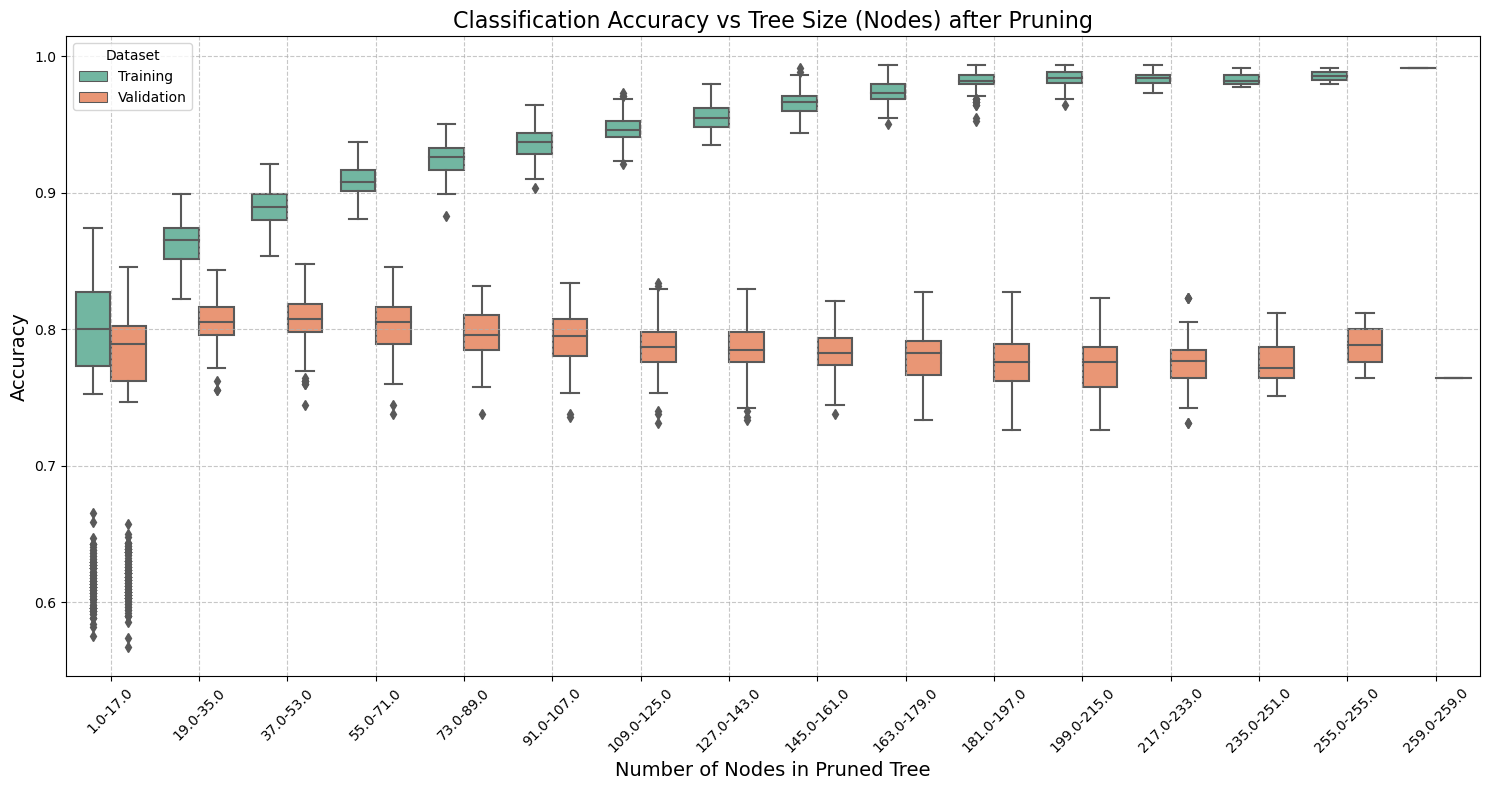

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict

import matplotlib.pyplot as plt

# Number of repetitions
n_iterations = 100

# Function to count nodes in a tree
def count_nodes(tree):
    """Count the number of nodes in a decision tree"""
    n_nodes = tree.tree_.node_count
    return n_nodes

# Function to prune tree by threshold
def prune_tree(tree, X_train, y_train, X_val, y_val):
    """Prune a decision tree by effective alpha threshold and evaluate performance"""
    result = []
    
    # Get the cost complexity path
    path = tree.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas
    
    # Make sure we have enough alphas to evaluate (use up to 20)
    if len(ccp_alphas) > 20:
        # Take a subset for efficiency
        step = len(ccp_alphas) // 20
        ccp_alphas = ccp_alphas[::step]
        if ccp_alphas[-1] != path.ccp_alphas[-1]:
            ccp_alphas = np.append(ccp_alphas, path.ccp_alphas[-1])
    
    # Iterate through different alpha values for pruning
    for alpha in ccp_alphas:
        # Train a pruned tree with the current alpha
        pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
        pruned_tree.fit(X_train, y_train)
        
        # Get predictions
        y_train_pred = pruned_tree.predict(X_train)
        y_val_pred = pruned_tree.predict(X_val)
        
        # Calculate accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        val_acc = accuracy_score(y_val, y_val_pred)
        
        # Count nodes
        n_nodes = count_nodes(pruned_tree)
        
        # Store results
        result.append({
            'ccp_alpha': alpha,
            'n_nodes': n_nodes,
            'train_acc': train_acc,
            'val_acc': val_acc
        })
    
    return pd.DataFrame(result)

# Container for results across all iterations
all_results = defaultdict(list)

# Run the experiment multiple times
for i in range(n_iterations):
    # Split the data 50/50
    X_train, X_val, y_train, y_val = train_test_split(
        X_processed, y, test_size=0.5, random_state=i)
    
    # Fit a full tree to use as a base for pruning
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    
    # Prune the tree and evaluate performance
    pruning_results = prune_tree(tree, X_train, y_train, X_val, y_val)
    
    # Store results by node count for later aggregation
    for _, row in pruning_results.iterrows():
        all_results[row['n_nodes']].append({
            'iteration': i,
            'train_acc': row['train_acc'],
            'val_acc': row['val_acc']
        })

# Convert results to a format suitable for plotting
plot_data = []
for n_nodes, results in sorted(all_results.items()):
    for result in results:
        plot_data.append({
            'n_nodes': n_nodes,
            'accuracy': result['train_acc'],
            'dataset': 'Training'
        })
        plot_data.append({
            'n_nodes': n_nodes,
            'accuracy': result['val_acc'],
            'dataset': 'Validation'
        })

plot_df = pd.DataFrame(plot_data)

# Create node count bins for more readable plotting
node_counts = sorted(plot_df['n_nodes'].unique())
if len(node_counts) > 15:  # If we have too many unique node counts, bin them
    bins = []
    current_bin = [node_counts[0]]
    
    for i in range(1, len(node_counts)):
        # If the bin gets too large or we're at the end
        if len(current_bin) >= len(node_counts) / 15 or i == len(node_counts) - 1:
            bins.append(current_bin)
            current_bin = [node_counts[i]]
        else:
            current_bin.append(node_counts[i])
    
    if current_bin:  # Add the last bin if not empty
        bins.append(current_bin)
    
    # Create bin labels and map nodes to bins
    bin_labels = [f"{min(b)}-{max(b)}" for b in bins]
    node_to_bin = {}
    
    for i, bin_nodes in enumerate(bins):
        for node in bin_nodes:
            node_to_bin[node] = bin_labels[i]
    
    # Add bin column to the dataframe
    plot_df['node_bin'] = plot_df['n_nodes'].map(node_to_bin)
else:
    # If few enough node counts, use them directly
    plot_df['node_bin'] = plot_df['n_nodes'].astype(str)

# Plot the results
plt.figure(figsize=(15, 8))
sns.boxplot(x='node_bin', y='accuracy', hue='dataset', data=plot_df, 
            palette='Set2')

plt.title('Classification Accuracy vs Tree Size (Nodes) after Pruning', fontsize=16)
plt.xlabel('Number of Nodes in Pruned Tree', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Add a legend
plt.legend(title='Dataset')

# Show the plot
plt.show()

# Calculate and print summary statistics
# summary_stats = plot_df.groupby(['n_nodes', 'dataset'])['accuracy'].agg(['mean', 'std']).reset_index()
# print("Summary Statistics:")
# print(summary_stats)

# # Calculate the gap between training and validation accuracy by node count
# train_means = plot_df[plot_df['dataset'] == 'Training'].groupby('n_nodes')['accuracy'].mean()
# val_means = plot_df[plot_df['dataset'] == 'Validation'].groupby('n_nodes')['accuracy'].mean()
# gap = train_means - val_means

# plt.figure(figsize=(12, 6))
# plt.plot(train_means.index, train_means.values, marker='o', linestyle='-', label='Training')
# plt.plot(val_means.index, val_means.values, marker='x', linestyle='-', label='Validation')
# plt.plot(gap.index, gap.values, marker='^', linestyle='--', label='Gap')

# plt.title('Mean Accuracy and Gap by Tree Size', fontsize=16)
# plt.xlabel('Number of Nodes', fontsize=14)
# plt.ylabel('Accuracy / Gap', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend()
# plt.tight_layout()
# # plt.show()


# The plot shows the relationship between the number of nodes in the pruned decision tree and the classification accuracy.
# It also includes the gap between training and validation accuracy.
# The boxplot provides a visual representation of the distribution of accuracies for different tree sizes,
# indicating how the model's performance varies with the complexity of the tree.
# we can see that as the number of nodes increases, the training accuracy tends to increase,
# while the validation accuracy shows more variability.